# Multivariate Regression

# Show the collections that have been generated

In [10]:
from pymongo import MongoClient
from process_collection import *
#  IMPORTANT:  Set these for each run:
#################################################
# mongoServer = None   # use the local mongodb server installed on your computer
#mongoServer = 'mongodb://server.mcgarity.info:27017/'  # Art's personal server
#mongoServer = 'mongodb://ubuntu:27017/'  # ubuntu Linux virtual machine on Art's Mac
mongoServer = 'mongodb://aws-2.greenphilly.net:27017/'  # aws-2 server for GreenPhilly
database = "jcohen4"
username = "jcohen4"
password = "wingohocking"
authenticationDatabase = "jcohen4"

client = MongoClient(mongoServer)
################################################

db = client[database]
db.authenticate(username, password, source=authenticationDatabase)  # pass credentials to database
collectionNames = sorted(db.collection_names())
collectionNames

[u'2008',
 u'2008trial1',
 u'2008trial3',
 u'2008trial4',
 u'2008trial6',
 u'first_wingo_test',
 u'fourth_wingo_test',
 u'impervFixed',
 u'impervNotFixed',
 u'july',
 u'july10',
 u'july12',
 u'july13',
 u'july14',
 u'july15',
 u'july16',
 u'july17',
 u'july2',
 u'july21',
 u'july22',
 u'july23',
 u'july24',
 u'july3',
 u'july4',
 u'july5',
 u'july6',
 u'july7',
 u'july8',
 u'july9',
 u'largeTrialLinier',
 u'multivariate_250_2010',
 u'multivariate_random_250_2010',
 u'multivariate_random_250_2011',
 u'multivariate_random_250_2012',
 u'multivariate_random_250_2013',
 u'randomTrial1',
 u'randomTrial2',
 u'randomTrial4',
 u'randomTrial5',
 u'random_multivariate',
 u'random_multivariate2',
 u'random_multivariate2009',
 u'random_multivariate2009year',
 u'random_multivariate2010',
 u'random_multivariate2012year',
 u'random_multivariate250',
 u'random_multivariate250_2009',
 u'random_multivariate3',
 u'random_multivariate5',
 u'random_multivariate6',
 u'random_multivariate7',
 u'random_multiva

In [11]:
from get_cso import calculate_cso
acft_to_mgal = 0.325851  # 1 acre-ft = 0.325851 MGal
collectionName = 'y16m12d27_AEM_45_Subcat_Leeds_Tree_Trench_and_Rain_Barrel_5'
runs = db[collectionName]
cursor = runs.find()
noLidRun = cursor[0]
noLidVolume = noLidRun['volume']  # 10^6 Gal / yr
noLidPeak = noLidRun['peak']   # cfs
noLidRunoff = noLidRun['runoff']  # acre-ft/yr
outflowSeries = noLidRun['outflow_series']
ratio = 0.05
csoResults = calculate_cso(outflowSeries,ratio)
csoVolumeMGal = csoResults['cso_volume']/1e6
print "noLidPeak = %0.2f cfs, noLidVolume = %0.2f MGal" % (noLidPeak,noLidVolume)
print "noLid Runoff = %0.2f acre-ft = %0.2f MGal" % (noLidRunoff,noLidRunoff*acft_to_mgal)
print "noLid csoVolumeMGal = %0.2f MGal" % csoVolumeMGal
# NOTE: Volume is total flow volume at sewer outlet while Runoff is total runoff volume
#       so they will likely be slightly different
noLidRunParamsList = noLidRun['runParamList']
#print noLidRunParamsList

noLidPeak = 1948.45 cfs, noLidVolume = 1948.90 MGal
noLid Runoff = 5987.73 acre-ft = 1951.11 MGal
noLid csoVolumeMGal = 687.45 MGal


In [25]:
# Compute Annual CSO Flows from results stored on Mongo
from get_cso import * 
from process_collection import * 
collectionName = 'y16m12d27_AEM_45_Subcat_Leeds_Tree_Trench_and_Rain_Barrel_5'
ratio = 0.05
numSubcatch = 45
numLID = 2
numVariables = numSubcatch*numLID
results = volume_reduction_and_runoff_volume_vs_lid_number(collectionName, numVariables, db)
volReduction = results["volReductionList"]
numberOfRuns = len(volReduction)
volReductionMgal = [x / 1e6 for x in volReduction]
numberOfRuns = len(volReductionMgal)
#print volReduction
# ALERT:  in cso_reduction, collectionName and numSubCatch is never used !!!
csoResults = cso_reduction(collectionName, ratio, numSubcatch, results) 
csoReduction = csoResults["csoReduction"]
csoReductionMgal = [x / 1e6 for x in csoReduction]
#print csoReduction
cso = csoResults["cso"]
#print cso
totVol = csoResults["totalVol"]
print "Number of Runs stored in Database = %d" % numberOfRuns
#print results['numLists'][0]

Number of Runs stored in Database = 299
[0, 519, 488, 292, 162, 201, 210, 2, 246, 404, 116, 521, 267, 305, 105, 670, 172, 232, 351, 188, 95, 525, 446, 605, 117, 76, 102, 207, 144, 24, 174, 138, 187, 12, 178, 32, 73, 220, 99, 195, 165, 12, 144, 178, 47, 45, 63, 8, 2, 29, 71, 41, 32, 14, 44, 66, 75, 58, 48, 7, 65, 16, 32, 20, 274, 290, 718, 574, 378, 76, 426, 533, 412, 496, 480, 396, 583, 514, 495, 419, 552, 501, 429, 535, 465, 566, 574, 417, 465, 586, 274, 268, 85, 111, 88, 177, 72, 113, 238, 283, 37, 81, 276, 10, 220, 28, 109, 99, 203, 249, 184, 142, 208, 61, 153, 144, 150, 206, 225, 124, 127, 227, 153, 102, 293, 209, 244, 36, 120, 294, 261, 138, 320, 109, 265, 33, 519, 26, 36, 29, 59, 138, 79, 239, 131, 203, 45, 6, 494, 247, 58, 154, 159, 96, 168, 51, 2, 256, 196, 42, 276, 286, 37, 327, 53, 321, 82, 101, 472, 20, 32, 170, 255, 456, 222, 280, 35, 72, 60, 32, 11, 109, 63, 45, 338, 5, 247, 290, 418, 171, 278, 346, 34, 93, 20, 189, 4, 266, 119, 277, 195, 37, 112, 213, 3, 92, 577, 58, 5, 2

In [30]:
# Compute total greened acres:
#print results['numLists'][0]
gaPerLid = [0.1,0.936]
greenedAcres = []
numRuns = len(results['numLists'])
for run in range(0,2):
    variable = 0
    lidList = results['numLists'][run]
    gaTotalThisRun = 0
    for lid in range(0,numLID):
        for subcat in range(0,numSubcatch):
            numberLID = lidList[variable]
            thisGreenedAcres = gaPerLid[lid]*numberLID
            gaTotalThisRun += thisGreenedAcres
            variable += 1
    greenedAcres.append(gaTotalThisRun)
print greenedAcres


[13029.639999999998, 33714.81599999999]


In [19]:
# Multivariable Regression for Annual CSO Volumes
import numpy as np
import statsmodels.api as sm
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    statistics = sm.OLS(y, X).fit()
    return statistics
### regression
y = csoResults["csoReduction"]
# list of variable values (LID numbers) for each random LID placement:
X = results['numLists']   # a list of lists (so upper case)
stats = reg_m(y,X)
print "Exact r-squared:"
print stats.rsquared
print stats.summary()
print stats.params
#print X

[[0, 519, 488, 292, 162, 201, 210, 2, 246, 404, 116, 521, 267, 305, 105, 670, 172, 232, 351, 188, 95, 525, 446, 605, 117, 76, 102, 207, 144, 24, 174, 138, 187, 12, 178, 32, 73, 220, 99, 195, 165, 12, 144, 178, 47, 45, 63, 8, 2, 29, 71, 41, 32, 14, 44, 66, 75, 58, 48, 7, 65, 16, 32, 20, 274, 290, 718, 574, 378, 76, 426, 533, 412, 496, 480, 396, 583, 514, 495, 419, 552, 501, 429, 535, 465, 566, 574, 417, 465, 586, 274, 268, 85, 111, 88, 177, 72, 113, 238, 283, 37, 81, 276, 10, 220, 28, 109, 99, 203, 249, 184, 142, 208, 61, 153, 144, 150, 206, 225, 124, 127, 227, 153, 102, 293, 209, 244, 36, 120, 294, 261, 138, 320, 109, 265, 33, 519, 26, 36, 29, 59, 138, 79, 239, 131, 203, 45, 6, 494, 247, 58, 154, 159, 96, 168, 51, 2, 256, 196, 42, 276, 286, 37, 327, 53, 321, 82, 101, 472, 20, 32, 170, 255, 456, 222, 280, 35, 72, 60, 32, 11, 109, 63, 45, 338, 5, 247, 290, 418, 171, 278, 346, 34, 93, 20, 189, 4, 266, 119, 277, 195, 37, 112, 213, 3, 92, 577, 58, 5, 26, 254, 68, 230, 125, 241, 106, 275, 32

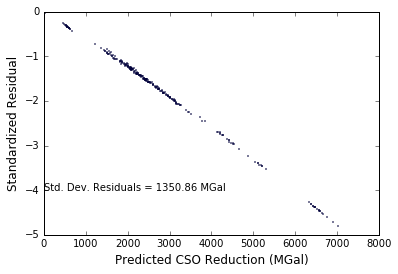

In [14]:
# Generate Residuals Plot for Annual CSO Volumes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# First, transpose results['numLists']:
xVals = zip(*results['numLists'])
#print list(xvals[0])

betaZero = stats.params[numVariables]
yPredicted = []
for xTuple in xVals:
    i = 0
    yval = betaZero
    for beta in stats.params:
        yval += beta*xTuple[i]
        i += 1
        if i == numVariables:
            break
    yPredicted.append(yval/1e6)  # convert to 10^6 Gal
residuals = []
i = 0
for ySWMM in csoReductionMgal:
    #print ySWMM
    resid = ySWMM - yPredicted[i]  # Residual in 10^6 Gal
    residuals.append(resid)
    i+=1
stdDevResiduals = np.std(residuals, ddof=1) #ddof=1 for SAMPLE std. dev.
standardizedResiduals = [x / stdDevResiduals for x in residuals]
(fig, ax1) = plt.subplots()
ax1.plot(yPredicted,standardizedResiduals,'ko',color = 'b',markersize = 1)
ax1.set_xlabel("Predicted CSO Reduction (MGal)",fontsize=12)
#ax1.set_ylabel("Residual (MGal)",fontsize=12)
ax1.set_ylabel("Standardized Residual",fontsize=12)
stdDevText = "Std. Dev. Residuals = %0.2f MGal" % stdDevResiduals
ax1.text(2,-4,stdDevText)

In [15]:
# Multivariable Regression for Sewer Outflow Volume
import numpy as np
import statsmodels.api as sm
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    statistics = sm.OLS(y, X).fit()
    return statistics
### regression
y = volReduction
# list of variable values (LID numbers) for each random LID placement:
X = results['numLists']   # a list of lists (so upper case)
stats = reg_m(y,X)
print "Exact r-squared:"
print stats.rsquared
print stats.summary()
print stats.params
#print X

Exact r-squared:
0.997740246863
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     907.6
Date:                Thu, 29 Dec 2016   Prob (F-statistic):          2.17e-209
Time:                        07:13:06   Log-Likelihood:                -4858.5
No. Observations:                 276   AIC:                             9899.
Df Residuals:                     185   BIC:                         1.023e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          7.316e+0

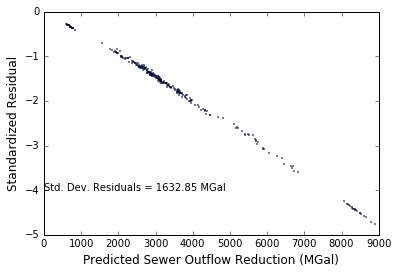

In [16]:
# Generate Residuals Plot for Sewer Outflow Volume
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# First, transpose results['numLists']:
xVals = zip(*results['numLists'])
#print list(xvals[0])

betaZero = stats.params[numVariables]
yPredicted = []
for xTuple in xVals:
    i = 0
    yval = betaZero
    for beta in stats.params:
        yval += beta*xTuple[i]
        i += 1
        if i == numVariables:
            break
    yPredicted.append(yval/1e6)  # convert to 10^6 Gal
residuals = []
i = 0
for ySWMM in volReductionMgal:
    #print ySWMM
    resid = ySWMM - yPredicted[i]  # Residual in 10^6 Gal
    residuals.append(resid)
    i+=1
stdDevResiduals = np.std(residuals, ddof=1) #ddof=1 for SAMPLE std. dev.
standardizedResiduals = [x / stdDevResiduals for x in residuals]
(fig, ax1) = plt.subplots()
ax1.plot(yPredicted,standardizedResiduals,'ko',color = 'b',markersize = 1)
ax1.set_xlabel("Predicted Sewer Outflow Reduction (MGal)",fontsize=12)
ax1.set_ylabel("Standardized Residual",fontsize=12)
#ax1.set_ylabel("Residual (MGal)",fontsize=12)
stdDevText = "Std. Dev. Residuals = %0.2f MGal" % stdDevResiduals
ax1.text(2,-4,stdDevText)

Total number of SWMM runs = 276
[  0.48455748  60.58798697]


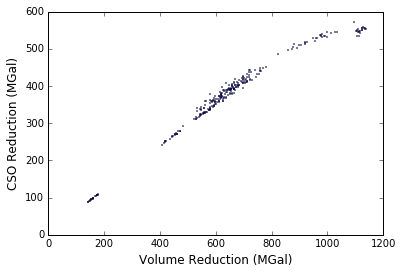

In [17]:
# SCATTER PLOT OF CSO ANNUAL VOLUME REDUCTION VS SEWER OUTFLOW ANNUAL VOLUME REDUCTION
%matplotlib inline
import matplotlib.pyplot as plt
print "Total number of SWMM runs = %d" % len(volReductionMgal)
#xRange = [50,70]
#yRange = [25,45]
# fit a straight line to CSO volume vs Outflow volume:
VolumeRed = []
VolumeRed.append(volReductionMgal)
stats = reg_m(csoReductionMgal,VolumeRed)
print stats.params
a = stats.params[1]  # intercept
b = stats.params[0]  # slope
#xline = []
#yline = []
#for xval in range(xRange[0],xRange[1]+1, 1):
#    xline.append(xval)
#    yval = a + b*xval
#    yline.append(yval)
(fig, ax1) = plt.subplots()
ax1.plot(volReductionMgal,csoReductionMgal,'ko',color = 'b',markersize = 1)
#ax1.plot(xline,yline)
ax1.set_xlabel("Volume Reduction (MGal)",fontsize=12)
ax1.set_ylabel("CSO Reduction (MGal)",fontsize=12)
#plt.xlim(xRange)
#plt.ylim(yRange)

In [18]:
### regression for total volume outflow
y = csoResults["totalVol"]
#print y
x = results['numLists']
#print x
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    statistics = sm.OLS(y, X).fit()
    return statistics
reg_m(y,x)

print "Exact r-squared:"
print reg_m(y, x).rsquared
print reg_m(y, x).summary()


Exact r-squared:
0.997775212382
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     921.9
Date:                Thu, 29 Dec 2016   Prob (F-statistic):          5.13e-210
Time:                        07:13:07   Log-Likelihood:                -4856.5
No. Observations:                 276   AIC:                             9895.
Df Residuals:                     185   BIC:                         1.022e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1         -7.322e+0